# Lab: Illusions

In the following labs we are going to look at visualisations. In this notebook, we will consider 2 'illusions', whereas the following ones will address misleading visualisations such as bar plots and line plots (@sec-axes-manipulation) and choropleth maps (@sec-choropleth-maps).

::: callout-note

## Altair
For this lab we will be using `Altair` - a plotting library which has more flexibility than seaborn. It is a little more complex and examples can be found [here](https://altair-viz.github.io/gallery/). `Altair` is not installed by default in Anaconda, but it has been included in the virtual environment for this module. If you are using the course's virtual environment, this should be installed for you the first time you set up your environment for the module. Refer to @sec-setup for instructions on how to set up your environment.

:::



## Clustering illusion

The cluster illusion refers to the natural tendency to wrongly see patterns or clusters in random data. You can find details of the clustering illusion [here](https://en.wikipedia.org/wiki/Clustering_illusion), [here](https://www.sciencedirect.com/science/article/abs/pii/004269899090160M), and [here](https://www.sciencedirect.com/science/article/pii/S0042698906000927).

::: aside

![1,000 points randomly distributed inside a square, showing apparent clusters and empty spaces](figs/Plot_of_random_points.gif)

:::

In [1]:
#| echo: false
# Remove warnings for this notebook.
import warnings
warnings.filterwarnings('ignore')

We will try to replicate the image on the aside by generating a random dataset of 700 points with random `x` and `y` coordinates, and visualising them on a scatterplot to see if we can see any false clustering:

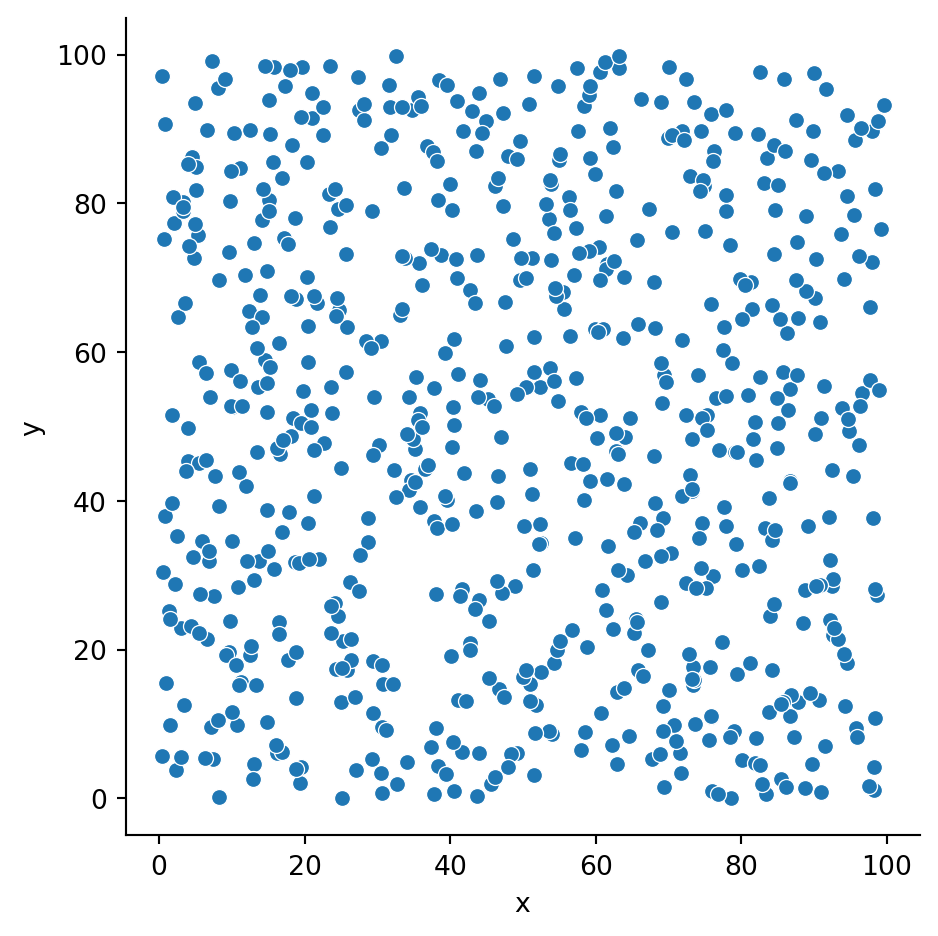

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import altair as alt

# Set number of observations in the dataframe that we are about to create.
n = 700

# Generate a random dataframe.
d = {'x': np.random.uniform(0, 100, n), 'y': np.random.uniform(0, 100, n)}
df = pd.DataFrame(d)

# Create a scatterplot with seaborn.
sns.relplot(data = df, x = 'x', y = 'y')

And now the same but using altair instead of seaborn. The syntax for building this type in Altair is pretty straight forward.

In [3]:
# Basic scatterplot in Altair
alt.Chart(df).mark_circle(size=5).encode(
    x='x',
    y='y')

alt.Chart(...)

To remove those pesky lines we need to specify we want an `x` and `y` axis without grid lines.

In [4]:
alt.Chart(df).mark_circle(size=5).encode(
    alt.X('x', axis=alt.Axis(grid=False)),
    alt.Y('y', axis=alt.Axis(grid=False)))

alt.Chart(...)


::: callout-caution
## Question
Do you see any clustering the in the above plots? What about if we give names to the different columns?

:::

We will do a lot of altering axis and colors in altair. We do this by specifying `alt.axistype` and then passing various options.

In [5]:
alt.Chart(df).mark_circle(size=5).encode(
    alt.X('x', axis=alt.Axis(grid=False, title='Height')),
    alt.Y('y', axis=alt.Axis(grid=False, title='Weight')))

alt.Chart(...)

### Streaks

Another example of the clustering illusion is the idea of 'streaks', which consists of (wrongly) identifying a pattern from a small sample and extrapolate out.

::: aside

![](figs/dice-roll.gif){width=200px}

:::

Let's imagine you roll a dice. What are the odds of it being 6? And if we do a second roll? And a third? And if we repeat it 10 times? Or conversely, would you be able to predict what the next dice roll would be after 10 attemtps?

Let's figure it out!



In [6]:
n_rolls = 10

# Generate a dataframe where we randomly get a number from 1-6 per n rounds.
d = {'round': np.linspace(1,n_rolls,n_rolls), 'roll': np.random.randint(1,7,n_rolls)}
df_dice = pd.DataFrame(d)

df_dice

,round,roll
0,1.0,3
1,2.0,2
2,3.0,6
3,4.0,3
4,5.0,6
5,6.0,3
6,7.0,2
7,8.0,4
8,9.0,5
9,10.0,6


<Axes: xlabel='round', ylabel='roll'>

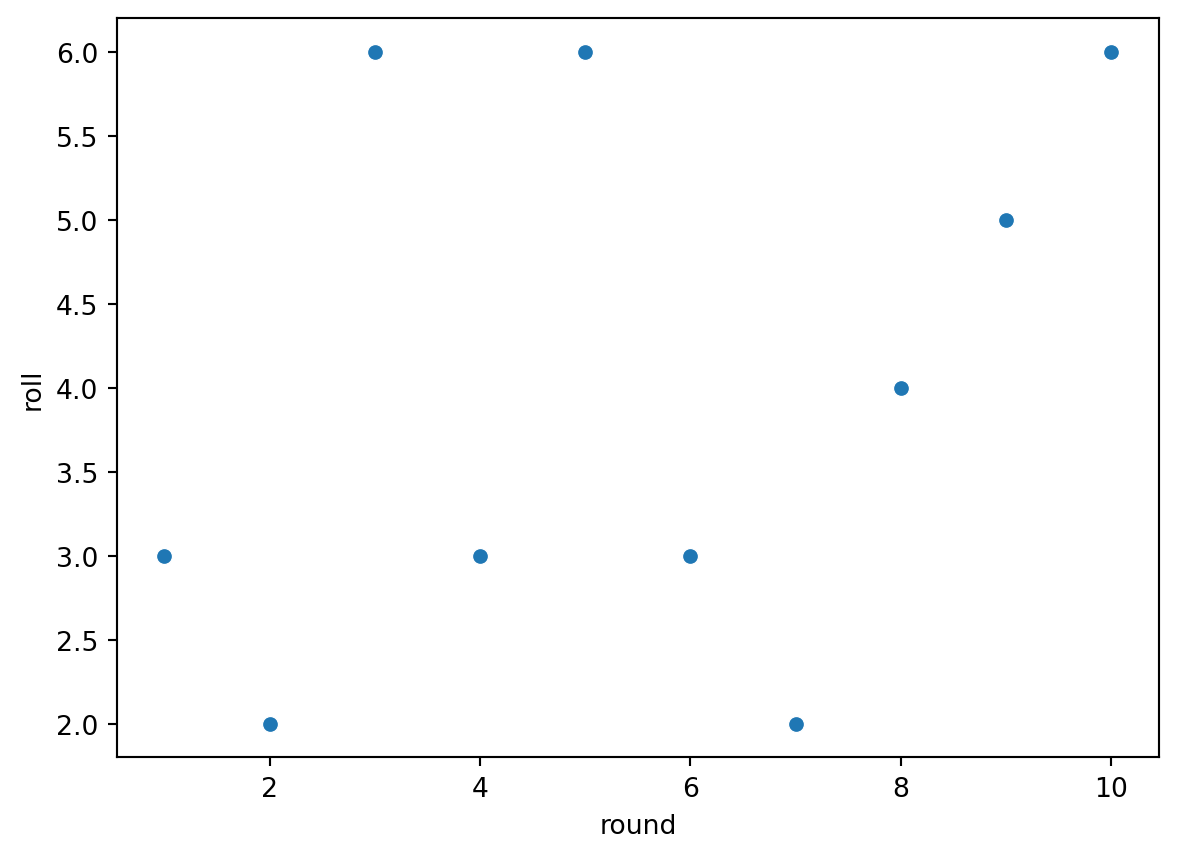

In [7]:
sns.scatterplot(data=df_dice, x='round', y='roll')

In [8]:
alt.Chart(df_dice).mark_circle(size=20).encode(
    alt.X('round', axis=alt.Axis(grid=False)),
    alt.Y('roll', axis=alt.Axis(grid=False)))

alt.Chart(...)

Each number on the dice will occur the same number of times. Any patterns you see are due to extrapolating based on a small sample. We can check that though by rolling the 'dice' 1,000,000 times.

In [9]:
n_rolls = 1000000
d = {'round': np.linspace(1,n_rolls,n_rolls), 'roll': np.random.randint(1,7,n_rolls)}
df_dice_many = pd.DataFrame(d)

df_dice_many.groupby('roll').count()

,round
roll,
1,166445
2,166827
3,166214
4,166517
5,166786
6,167211


## Weber-Fechner Law



> 'The Weber-Fechner Law is a famous finding of early psychophysics indicating that differences between stimuli are detected on a logarithmic scale. It takes more additional millimeters of radius to discern two larger circles than two smaller circles. This type of bias is probably one of the most researched biases in visualization research.' 
> 
> -- [@calero_valdez_studying_2018]

Let us see if we can create a plot to demonstrate it.

We will load in the car crashes dataset from seaborn. Documentation of the data is [here](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset).

In [10]:
df_crashes = sns.load_dataset('car_crashes')
df_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


To illustrate this 'illusion' we will plot the percentage of drivers speeding, percentage of alcohol impaired and set the size of the point equal to the percentage of drivers not previously involves in any accident. Each point is an american state.

Are there any relationships or patterns in the data?

<Axes: xlabel='speeding', ylabel='alcohol'>

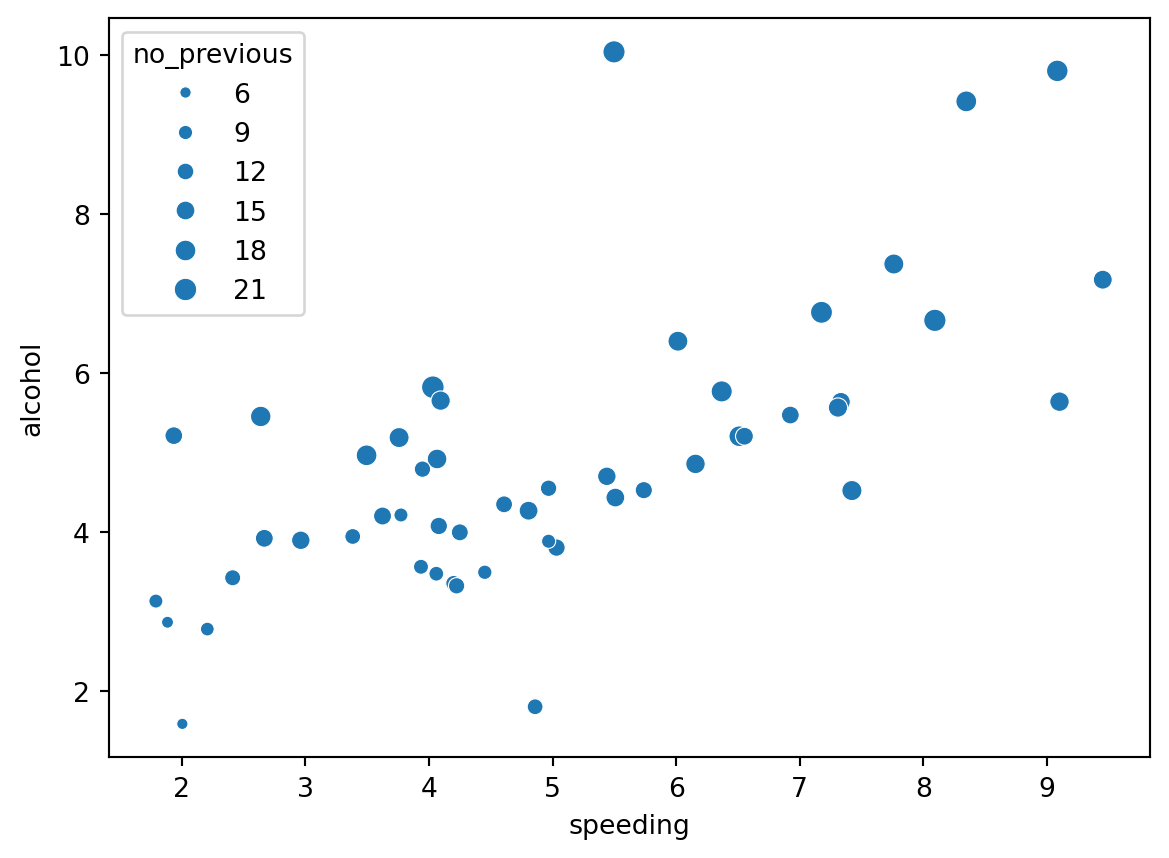

In [11]:
sns.scatterplot(data=df_crashes, x='speeding', y='alcohol', size='no_previous')

Is it easier to distinguish the different sizes in the below plot?

<Axes: xlabel='speeding', ylabel='alcohol'>

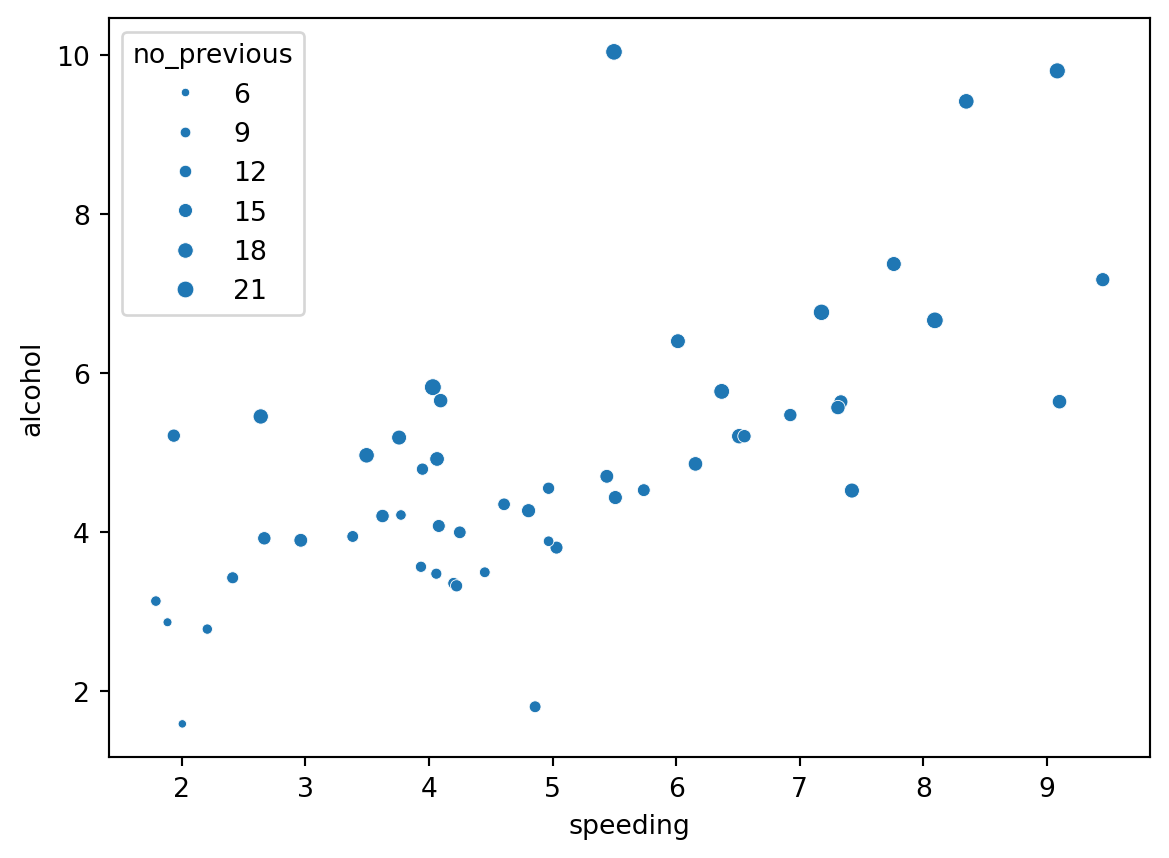

In [12]:
sns.scatterplot(data=df_crashes,
                x='speeding',
                y='alcohol',
                size='no_previous',
                sizes=(10,40))

How about this one?

<Axes: xlabel='speeding', ylabel='alcohol'>

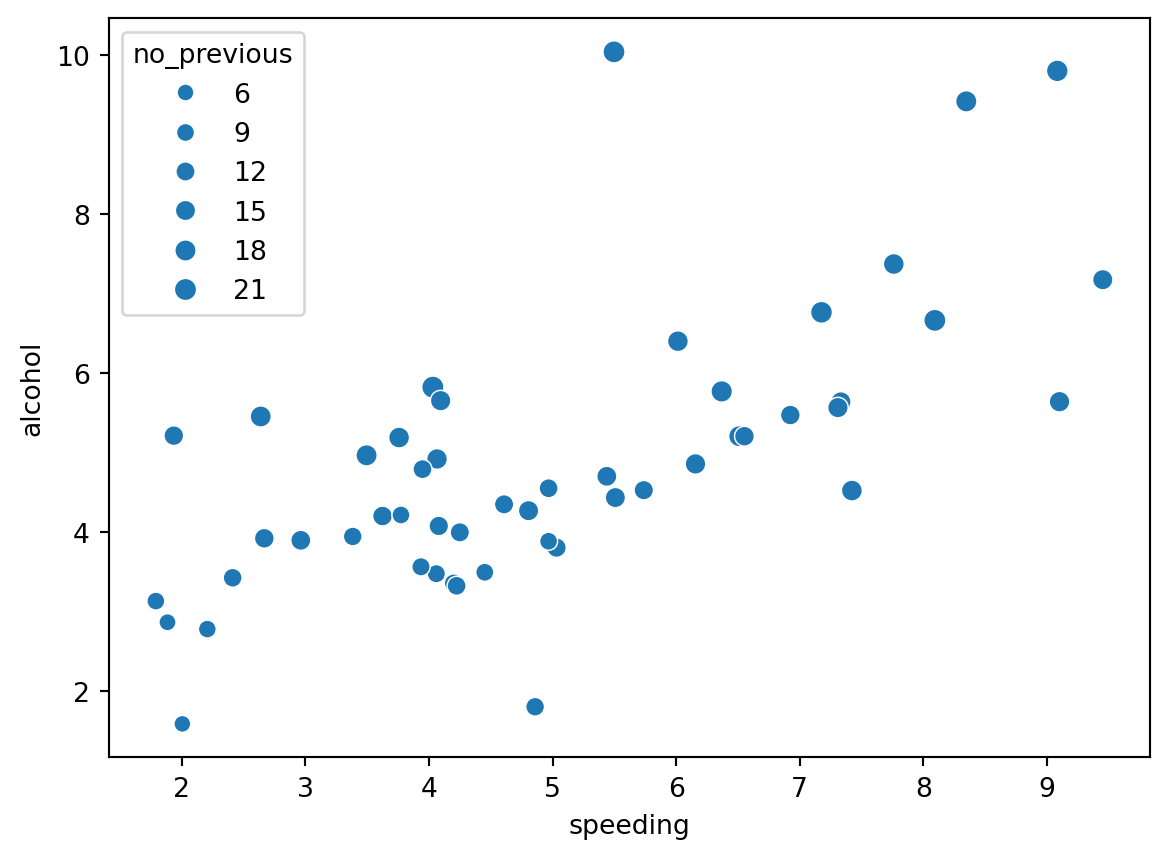

In [13]:
sns.scatterplot(data=df_crashes,
                x='speeding',
                y='alcohol',
                size='no_previous',
                sizes=(40,70))

The values are the same. We have just changed the range of sizes.

We can do much the same in altair.

In [14]:
alt.Chart(df_crashes).mark_circle().encode(
    x='speeding',
    y='alcohol',
    size='no_previous'
)

alt.Chart(...)

In [15]:
alt.Chart(df_crashes).mark_circle().encode(
    x='speeding',
    y='alcohol',
    size = alt.Size('no_previous', scale=alt.Scale(range=[10,40]))
)

alt.Chart(...)

In [16]:
alt.Chart(df_crashes).mark_circle().encode(
    x='speeding',
    y='alcohol',
    size = alt.Size('no_previous', scale=alt.Scale(range=[40,70]))
)

alt.Chart(...)

Have you come across any other illusions? If so, try and plot them out. I sometimes find it easier to understand these things through creating simple illustrations of my own.